In [1]:
from google.colab import drive
drive.mount('/content/drive')
import nltk
nltk.download ('punkt')
from nltk.tokenize import word_tokenize
!pip uninstall spacy -y 
!pip install -U spacy>=3.0
!python -m spacy download ru_core_news_md
import spacy
nlp = spacy.load('ru_core_news_md')


Mounted at /content/drive
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Found existing installation: spacy 2.2.4
Uninstalling spacy-2.2.4:
  Successfully uninstalled spacy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.9 MB 1.3 MB/s 
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 8.2 MB 10.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


In [2]:
path ='/content/drive/My Drive/rus_yaz.txt' 
text = open(path, encoding='utf-8').read()
document = nlp(text)
outname = path.replace('.txt', '-lemmatized.txt') 
with open(outname, 'w', encoding='utf8') as out:
    for token in document:
        out.write(token.lemma_.lower())
        out.write(' ')

In [3]:
path ='/content/drive/My Drive/rus_yaz-lemmatized.txt' 
text = open(path, encoding='utf-8').read()
tokens = nltk.word_tokenize(text)
print (tokens)

['как', 'художник', 'изобразить', 'процесс', 'рождение', 'речь', '?', 'попробовать', 'расшифровать', 'и', 'озвучить', 'рисунок', '.', 'почему', 'автор', 'считать', 'слово', 'главный', 'в', 'наш', 'речь', '?', 'прочитай', '.', 'главный', 'в', 'наш', 'речь', '—', 'слово', '.', 'слово', '—', 'самое', 'общий', 'и', 'самое', 'точный', 'обозначение', 'любой', 'вещь', ',', 'любой', 'действие', ',', 'любой', 'предмет', '.', 'оно', 'позволять', 'человек', 'думать', 'о', 'чём', 'угодно', ',', 'рассказывать', ',', 'рассуждать', '.', 'выпиши', 'предложение', 'с', 'главный', 'утверждение', 'о', 'слово', 'в', 'речь', '.', 'укажи', 'сверху', 'имя', 'существительные', '.', 'какой', 'образный', 'слово', 'и', 'сравнение', 'использовать', 'при', 'описание', 'снег', '?', 'снежинка', ',', 'как', 'белый', 'муха', ',', 'слетать', 'на', 'земля', '.', 'не', 'сочтёте', 'белый', 'муха', ',', 'что', 'летать', ',', 'словно', 'пух', '.', 'лебедь', 'белый', 'на', 'земля', 'село', ',', 'весь', 'пух', 'одеть', '.', 'н

In [4]:
import gensim
from gensim import corpora

[(',', 3289), ('.', 3198), ('?', 1358), ('слово', 1165), ('в', 991), (')', 833), ('(', 706), ('и', 697), ('—', 640), ('..', 520), ('какой', 515), ('...', 411), ('•', 403), ('с', 376), ('на', 329), ('по', 319), ('запиши', 314), ('``', 302), ('что', 274), (':', 272), ('предложение', 264), ('текст', 254), ('из', 220), ('как', 216), ('а', 211), (']', 187), ('[', 185), ('часть', 184), ('буква', 180), ('-', 177), ('о', 171), ('этот', 166), ('прочитай', 164), ('к', 159), ('их', 156), ('ли', 147), ('можно', 145), ('согласный', 135), ('ты', 132), ('речь', 126), ('!', 125), ('не', 118), ('имя', 114), ('для', 111), ('подчеркни', 107), ('значение', 105), ('звук', 104), ('почему', 101), ('у', 101), (';', 98)]


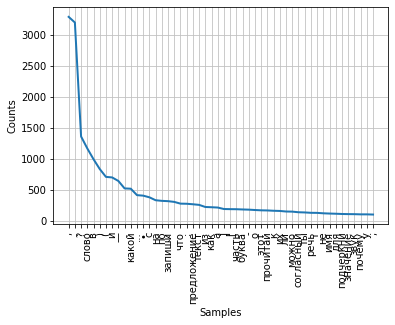

In [5]:
#до чистки от стоп-слов и символов
import nltk
from nltk.probability import FreqDist
freq = nltk.FreqDist(tokens)
fdist = FreqDist(tokens)
print(fdist.most_common(50)) 
fdist.plot(50,cumulative=False)

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
#print (stop_words)
stop_words.extend(['этот','весь','для','было','стать','что','был', 'была','это', 'свой','как', 'его', 'только','тот', 'однако', 'под', 'также', 'который', 'тыс','как', 'на', 'по' ])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
filtered_tokens = []
for token in tokens:
  if token not in stop_words:
    filtered_tokens.append(token)
print (filtered_tokens)

['художник', 'изобразить', 'процесс', 'рождение', 'речь', '?', 'попробовать', 'расшифровать', 'озвучить', 'рисунок', '.', 'почему', 'автор', 'считать', 'слово', 'главный', 'наш', 'речь', '?', 'прочитай', '.', 'главный', 'наш', 'речь', '—', 'слово', '.', 'слово', '—', 'самое', 'общий', 'самое', 'точный', 'обозначение', 'любой', 'вещь', ',', 'любой', 'действие', ',', 'любой', 'предмет', '.', 'оно', 'позволять', 'человек', 'думать', 'чём', 'угодно', ',', 'рассказывать', ',', 'рассуждать', '.', 'выпиши', 'предложение', 'главный', 'утверждение', 'слово', 'речь', '.', 'укажи', 'сверху', 'имя', 'существительные', '.', 'образный', 'слово', 'сравнение', 'использовать', 'описание', 'снег', '?', 'снежинка', ',', 'белый', 'муха', ',', 'слетать', 'земля', '.', 'сочтёте', 'белый', 'муха', ',', 'летать', ',', 'словно', 'пух', '.', 'лебедь', 'белый', 'земля', 'село', ',', 'пух', 'одеть', '.', 'найти', 'выпиши', 'загадка', 'отгадками', '.', 'укажи', 'имя', 'существительные', 'глагол', '.', 'подчеркни',

In [8]:
lema=[w for w in filtered_tokens if w.isalpha() and len(w)>2]

[('слово', 1165), ('запиши', 314), ('предложение', 264), ('текст', 254), ('часть', 184), ('буква', 180), ('прочитай', 164), ('согласный', 135), ('речь', 126), ('имя', 114), ('подчеркни', 107), ('значение', 105), ('звук', 104), ('почему', 101), ('гласный', 92), ('орфограмма', 89), ('запись', 89), ('каждый', 87), ('название', 87), ('язык', 86), ('мягкий', 84), ('нужный', 83), ('вопрос', 83), ('записать', 80), ('спиши', 79), ('выпиши', 76), ('проверочный', 70), ('написание', 63), ('мочь', 62), ('знак', 62), ('составь', 60), ('пословица', 60), ('предмет', 59), ('корень', 58), ('использовать', 57), ('друг', 57), ('лес', 54), ('рисунок', 51), ('человек', 51), ('главный', 50), ('укажи', 49), ('русский', 49), ('называть', 49), ('письмо', 47), ('тебе', 45), ('помощь', 44), ('смысл', 44), ('книга', 44), ('слог', 44), ('стихотворение', 43)]


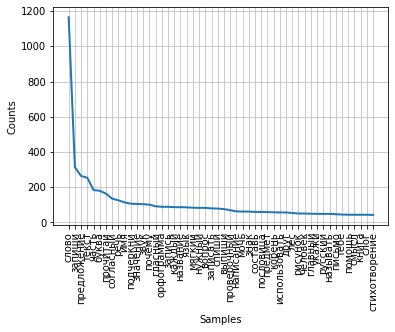

In [11]:
from nltk import FreqDist
freq = nltk.FreqDist(lema)
fdist = FreqDist(lema)
print(fdist.most_common(50)) 
fdist.plot(50,cumulative=False)

[(('часть', 'речь'), 85), (('запиши', 'слово'), 61), (('проверочный', 'слово'), 50), (('главный', 'член'), 35), (('прочитай', 'текст'), 35), (('значение', 'слово'), 34), (('мягкий', 'знак'), 33), (('имя', 'существительные'), 30), (('член', 'предложение'), 30), (('часть', 'слово'), 30), (('запиши', 'предложение'), 29), (('подчеркни', 'слово'), 28), (('составь', 'запиши'), 27), (('безударный', 'гласный'), 27), (('значимый', 'часть'), 27), (('русский', 'язык'), 26), (('спиши', 'текст'), 25), (('однокоренные', 'слово'), 25), (('мягкий', 'согласный'), 25), (('слово', 'предложение'), 23), (('связь', 'главный'), 21), (('слово', 'запиши'), 21), (('имя', 'прилагательные'), 21), (('выпиши', 'слово'), 20), (('вставлять', 'буква'), 20), (('слово', 'орфограмма'), 19), (('часть', 'текст'), 19), (('сочетание', 'слово'), 19), (('слово', 'слово'), 18), (('запиши', 'текст'), 18), (('двойной', 'согласный'), 18), (('укажи', 'часть'), 17), (('друг', 'другу'), 17), (('рассмотри', 'рисунок'), 17), (('запись'

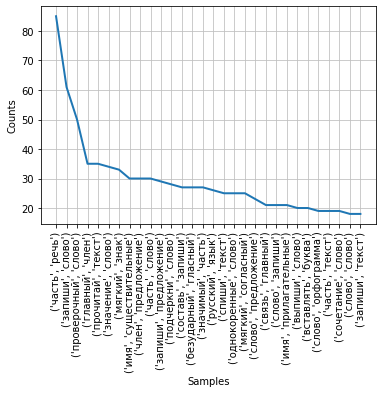

In [12]:
from nltk import FreqDist
bigram = list(nltk.ngrams(lema, 2))
print (FreqDist(bigram).most_common(50))
fdist = FreqDist(bigram)
fdist.plot(30,cumulative=False)

[(('главный', 'член', 'предложение'), 24), (('связь', 'главный', 'член'), 19), (('укажи', 'часть', 'речь'), 17), (('составь', 'запиши', 'предложение'), 16), (('значимый', 'часть', 'слово'), 16), (('запись', 'звуковой', 'строение'), 13), (('слово', 'часть', 'речь'), 13), (('звуковой', 'строение', 'слово'), 11), (('запиши', 'слово', 'пара'), 11), (('подчеркни', 'слово', 'орфограмма'), 10), (('проверить', 'друг', 'друга'), 10), (('парный', 'звонкий', 'глухой'), 9), (('звуко', 'буквенный', 'разбор'), 9), (('подбери', 'проверочный', 'слово'), 9), (('сделать', 'запись', 'звуковой'), 8), (('продиктуйте', 'друг', 'другу'), 8), (('разделительный', 'мягкий', 'знак'), 8), (('известный', 'тебе', 'орфограмма'), 8), (('звонкий', 'глухой', 'согласный'), 8), (('орфограмма', 'корн', 'слово'), 7), (('слово', 'двойной', 'согласный'), 7), (('произвести', 'звуко', 'буквенный'), 7), (('запиши', 'слово', 'распределять'), 7), (('слово', 'знак', 'ударение'), 7), (('обозначать', 'мягкий', 'согласный'), 7), (('с

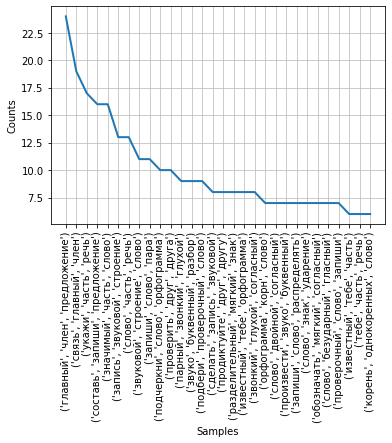

In [13]:
from nltk import FreqDist
trigram = list(nltk.ngrams(lema, 3))
print (FreqDist(trigram).most_common(50))
fdist2 = FreqDist(trigram)
fdist2.plot(30,cumulative=False)